In [1]:
%matplotlib inline

# N170: a visual index of facial recognition

Using this notebook, we will discuss and learn about the N170, an event-related potential that is associated with the perception of faces. 

In [2]:
# Imports
import os, numpy as np,pandas as pd
import warnings
warnings.filterwarnings('ignore')
import eegnb
from eegnb import generate_save_fn
from eegnb.devices.eeg import EEG
from eegnb.experiments.visual_n170 import n170
from collections import OrderedDict
import seaborn as sns
from matplotlib import pyplot as plt

# MNE functions
from mne import Epochs,find_events
from mne.decoding import Vectorizer

# EEG-Notebooks functions
from eegnb.analysis.utils2 import load_data,plot_conditions, check_report
from eegnb.datasets import fetch_dataset

There are actually two ways of running experiments using this set-up. Below is one example provided to you for ease of adjusting what it is that you want to test. You can then use this template to build your own variation of an experiment!

### Experiment set-up

In [3]:
# Here we can change the variables that we use for measuring experiments!

board_name = "muse2_bfn" # this can stay the same
experiment = "visual-N170" # this changes depending on the experiment, for the purposes of this notebook it can stay the same
subject_id = 1 # change this each time you have a new participant
session_nb = 1 # change this each time you have a new run
record_duration = 120 # this changes how long each session is

After this set-up, we will want to make sure we're using the right inputs before starting the experiment. Here's one way of looking at the inputs, based on where our data will be saved:

In [4]:
# Start EEG device
eeg_device = EEG(device=board_name, serial_num='Muse-B00E') # make sure to replace the serial_num with 'Muse-[your device's serial digits]'

# Create save file name
save_fn = generate_save_fn(board_name, experiment, subject_id, session_nb)
print(save_fn)

C:\Users\vanes\.eegnb\data\visual-N170\local\muse2_bfn\subject0001\session001\recording_2022-06-29-16.20.26.csv


If the subject and session are labeled with the right places, then that's where you'll find the data when the file is saved after the experiment runs. This is good to keep in mind for when you go find the data for analysis after.

Also, make sure you run the above cell once before every time you want to record the experiment. You'll see that the recording file name is time-stamped - if you don't run the cell again, you'll save over your old file with a new recording!

### Run experiment

Before starting

In [5]:
check_report(eeg_device)



Running signal quality check...
Accepting threshold stdev between: 1 - 18
running check (up to) 60 times, with 5-second windows
will stop after 2 good check results in a row



1/60

Signal quality:
   Fp1: √  (std:   6.0)
   Fp2: √  (std:   5.1)
  TP10: x  (std:  50.9)
   TP9: √  (std:  10.5)
Bad channels: TP10



2/60

Signal quality:
   Fp1: x  (std: 185.7)
   Fp2: x  (std: 325.2)
  TP10: x  (std: 658.4)
   TP9: x  (std: 468.8)
Bad channels: Fp1, Fp2, TP10, TP9



3/60

Signal quality:
   Fp1: √  (std:   7.7)
   Fp2: √  (std:   9.4)
  TP10: x  (std: 171.5)
   TP9: x  (std: 193.8)
Bad channels: TP10, TP9



4/60

Signal quality:
   Fp1: x  (std:  24.1)
   Fp2: x  (std:  29.2)
  TP10: x  (std:  30.6)
   TP9: x  (std:  34.0)
Bad channels: Fp1, Fp2, TP10, TP9



5/60

Signal quality:
   Fp1: √  (std:   8.2)
   Fp2: √  (std:   7.3)
  TP10: x  (std: 103.4)
   TP9: x  (std:  38.0)
Bad channels: TP10, TP9


Looks like you still have 2 bad channels after 5 tries


Checks will resume in 5 s

To start the experiment, just run the block of code below after running the previous blocks. 

In [6]:
n170.present(duration=record_duration, eeg=eeg_device, save_fn=save_fn)

144.6414 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [1280, 720]. Using actual size
146.2022 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [1280, 720]. Using actual size


If you are running the experiment multiple times, whether that's multiple sessions for a person or with different people, make sure that you are first running the previous cells where you change subject/session and also where the file is saved - otherwise, the files you generate will end up in the wrong folders!

### Visualize data

Let's get a quick look at the data and see what it looks like. For the record, it should look like this:

![N170](n170.jpg)

In [7]:
eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')    

# to load data from a specific subject and session:
subject = 1
session = 2
# make sure that these numbers are correct, or it will run from the last time you used 'subject' and 'session', 
# including from above!

raw = load_data(subject,session,
                experiment='visual-N170', site='local', device_name='muse2_bfn',
                data_dir = eegnb_data_path)

['TP9', 'Fp1', 'Fp2', 'TP10', 'stim']
['TP9', 'Fp1', 'Fp2', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=60508
    Range : 0 ... 60507 =      0.000 ...   236.355 secs
Ready.


We're going to do a couple of things here that we won't go into now, but will help the final visual look like what it does above. We'll talk more about this process when we do the analyses!

In [8]:
raw.filter(1,30, method='iir')
# raw.plot_psd(fmin=1, fmax=30); # visualize power spectrum after filtering

# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'House': 1, 'Face': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 60508

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

149 events found
Event IDs: [1 2]
sample drop %:  32.21476510067114


Number of events,101
Events,Face: 54House: 47
Time range,-0.102 – 0.801 sec
Baseline,off


We're looking for that sample drop % to be as low as possible. If yours is higher than 15%, check the raw number of trials that have come out. It could be that the original recording was a bit noisy, and that's okay.

Here's an example of what the next cell's output will look like: 

![results](n170_myplot.png)

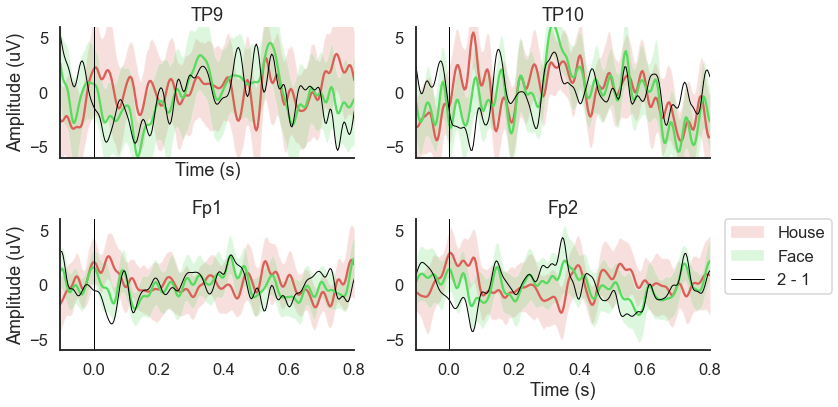

In [9]:
conditions = OrderedDict()
conditions['House'] = [1]
conditions['Face'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions, 
                          ci=97.5, n_boot=1000, title='',
                          channel_order=[0,1,3,2],
                          diff_waveform=(1, 2))

Use the below code to subsequently save your plot. Don't forget to change the name of the image file accordingly! Consider saving with the name of the person whose data this is, or anything else that will indicate to you whose file it is. 

In [6]:
fig.savefig('n170_myplot.png')